# ABEL experiment tracking example

By Carl A. Lindstrøm (University of Oslo), 8 Sep 2023

### Import ABEL framework

In [1]:
import sys
sys.path.append('../')
from abel import *

### Define the input beams

In [2]:
# define witness bunch
witness = SourceBasic()
witness.charge = -0.6e-9 # [C]
witness.energy = 10e9 # [eV]
witness.rel_energy_spread = 0.01
witness.bunch_length = 10e-6 # [m]
witness.z_offset = -160e-6 # [m]
witness.emit_nx, witness.emit_ny = 1e-6, 1e-6 # [m rad]
witness.beta_x, witness.beta_y = 10e-3, 10e-3 # [m]
witness.num_particles = 100000
witness.x_offset, witness.y_offset = 5e-6, 1e-6 # [m]
witness.jitter.x = 5e-6

# define drive bunch
driver = SourceBasic()
driver.charge = -2e-9 # [C]
driver.energy = 100e9 # [eV]
driver.rel_energy_spread = 0.01
driver.bunch_length = 20e-6 # [m]
driver.z_offset = 100e-6 # [m]
driver.emit_nx, driver.emit_ny = 10e-6, 10e-6 # [m rad]
driver.beta_x, driver.beta_y = 50e-3, 50e-3 # [m]
driver.num_particles = 100000
driver.symmetrize = True

### Define the experimental setup

initializing ocelot...


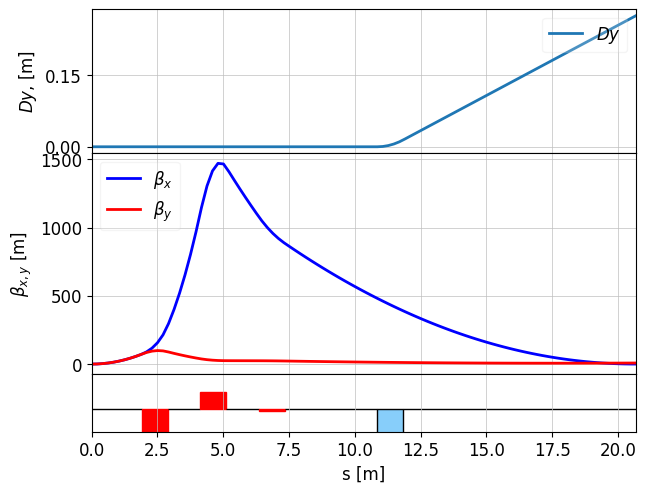

In [3]:
# define stage
stage = StageHipace()
stage.driver_source = driver
stage.length = 0.5 # [m]
stage.plasma_density = 1e22 # [m^-3]
stage.ion_motion = False
stage.beam_ionization = False

# define beam delivery system
bds = BeamDeliverySystemBasic()
bds.beta_x = stage.matched_beta_function(witness.energy) # [m]
bds.beta_y = stage.matched_beta_function(witness.energy) # [m]

# define spectrometer
spectrometer = SpectrometerFacetOcelot()
spectrometer.exact_tracking = False
spectrometer.bend_angle = -0.03 # [T]
spectrometer.obj_plane = 0 # [m]
spectrometer.mag_x = -2
spectrometer.img_energy = 10e9 # [eV]
spectrometer.plot_twiss()

# define experiment
experiment = Experiment(witness, bds, stage, spectrometer)

### Perform linac tracking

In [4]:
# perform experiment tracking
beam = experiment.run('hipace_example', overwrite=True)

Tracking element 1 (SourceBasic, stage 0, s = 0.0 m, 10.0 GeV, -0.60 nC, 1.0% rms, 1.0/1.0 µm-rad)
Tracking element 2 (BeamDeliverySystemBasic, stage 0, s = 0.0 m, 10.0 GeV, -0.60 nC, 1.0% rms, 1.0/1.0 µm-rad)


Finished HiPACE++ (job 5633942): 100%|████████████████████████████████████████| 952/952 [03:03<00:00,  5.19steps/s]


Tracking element 3 (StageHipace, stage 1, s = 0.5 m, 13.7 GeV, -0.60 nC, 1.2% rms, 1.1/2.6 µm-rad)
Tracking element 4 (SpectrometerFacetOcelot, stage 1, s = 21.2 m, 13.7 GeV, -0.60 nC, 1.2% rms, 18.6/2974.8 µm-rad)


### Plot the wakefield

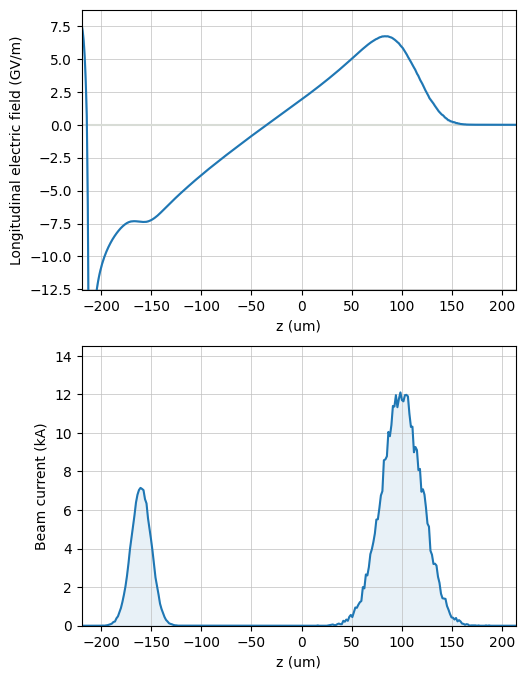

In [5]:
# plot wakefield
experiment.stage.plot_wakefield()

### Plot the spectrometer screen

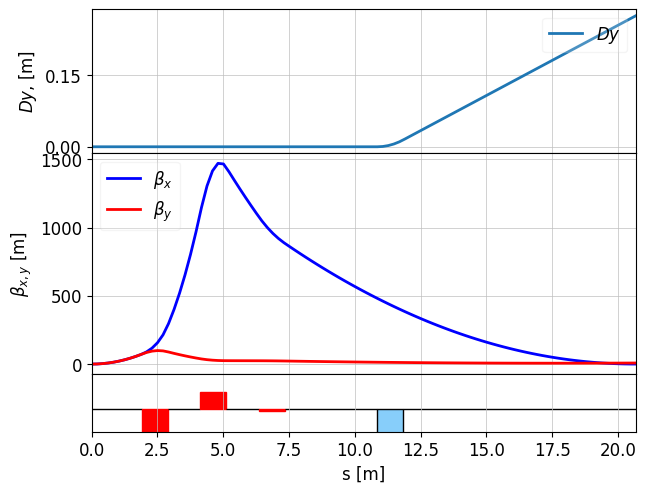

In [6]:
# plot the spectrometer imaging
spectrometer.plot_twiss()

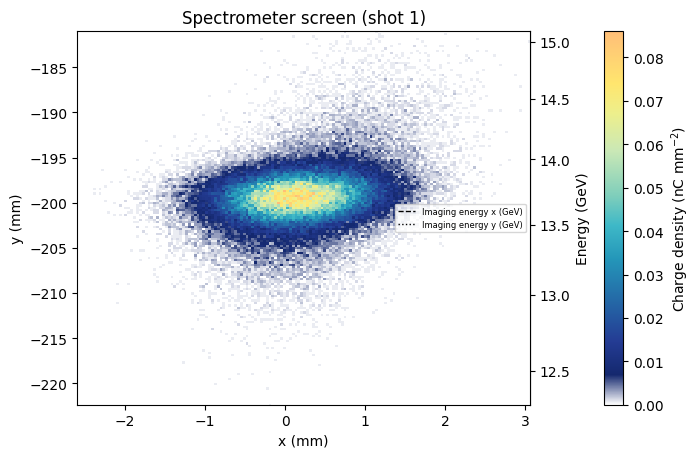

In [7]:
# plot the screen
experiment.plot_spectrometer_screen()

### Plot longitudinal phase space

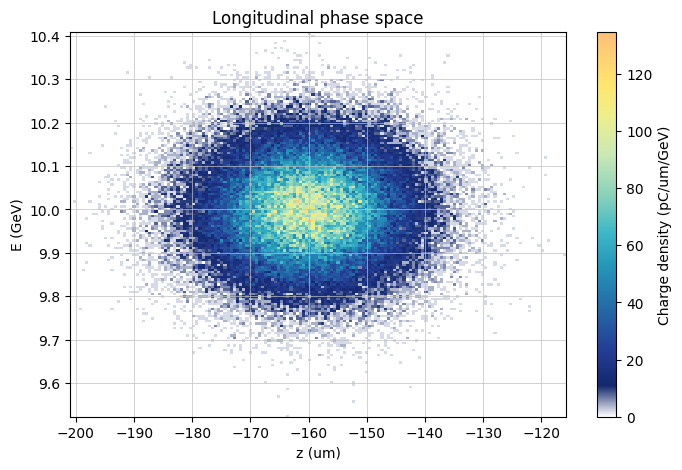

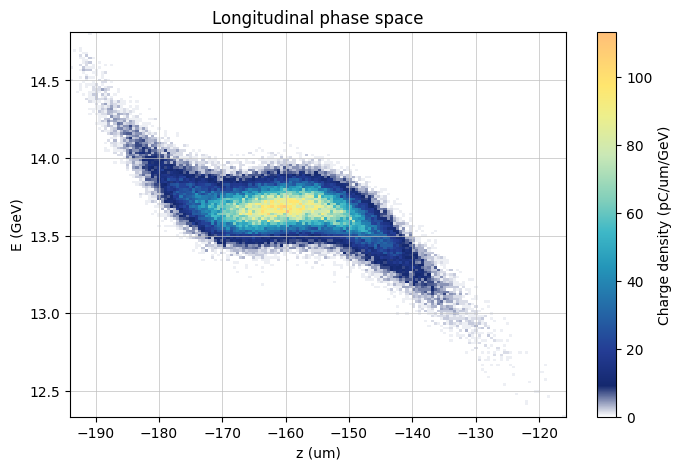

In [8]:
# plot the longitudinal phase space (at the beginning and end of the stage)
experiment.get_beam(0).plot_lps()
experiment.get_beam(-2).plot_lps()